In [1]:
import pandas as pd
from pathlib import Path
this_path = Path().resolve()
import numpy as np
data_path = this_path.parent / "data"
assert data_path.exists(), f"Data path {data_path} does not exist."
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(data_path / "metadata_v2.csv")
# shoppinglist = pd.read_csv(data_path / "shoppinglist.csv")
train_df = df[df['filename_index'].str.startswith('fungi_train')]
# train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

25863 train samples


In [15]:
train_df = train_df.dropna(axis=0, subset=['Habitat', 'Substrate'])
print(len(train_df), "train samples")
print(train_df.Habitat.nunique(), train_df.Substrate.nunique(), train_df.taxonID_index.nunique())

9108 train samples
26 20 128


In [ ]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
X, y = datasets.load_iris(return_X_y=True)
X
# OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

# X = train_df[['Habitat']]
# y = train_df['taxonID_index']

# # One-hot encode categorical variables
# X = pd.get_dummies(X, drop_first=True)

# # Add constant term for intercept
# X = sm.add_constant(X)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
X

,const,Habitat_Bog woodland,Habitat_Deciduous woodland,Habitat_Forest bog,Habitat_Mixed woodland (with coniferous and deciduous trees),Habitat_Thorny scrubland,Habitat_Unmanaged coniferous woodland,Habitat_Unmanaged deciduous woodland,Habitat_Willow scrubland,Habitat_bog,...,Habitat_hedgerow,Habitat_improved grassland,Habitat_lawn,Habitat_meadow,Habitat_natural grassland,Habitat_other habitat,Habitat_park/churchyard,Habitat_roadside,Habitat_salt meadow,"Habitat_wooded meadow, grazing forest"
10153,1.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10156,1.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10158,1.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10161,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10165,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35997,1.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35999,1.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36007,1.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36009,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [19]:
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [6]:
train_df.taxonID_index.value_counts()

taxonID_index
78.0     152
44.0     151
99.0     148
65.0     148
42.0     147
        ... 
36.0      24
108.0     23
149.0     23
89.0      22
148.0     13
Name: count, Length: 128, dtype: int64

/tmp/ipykernel_7161/3563896757.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


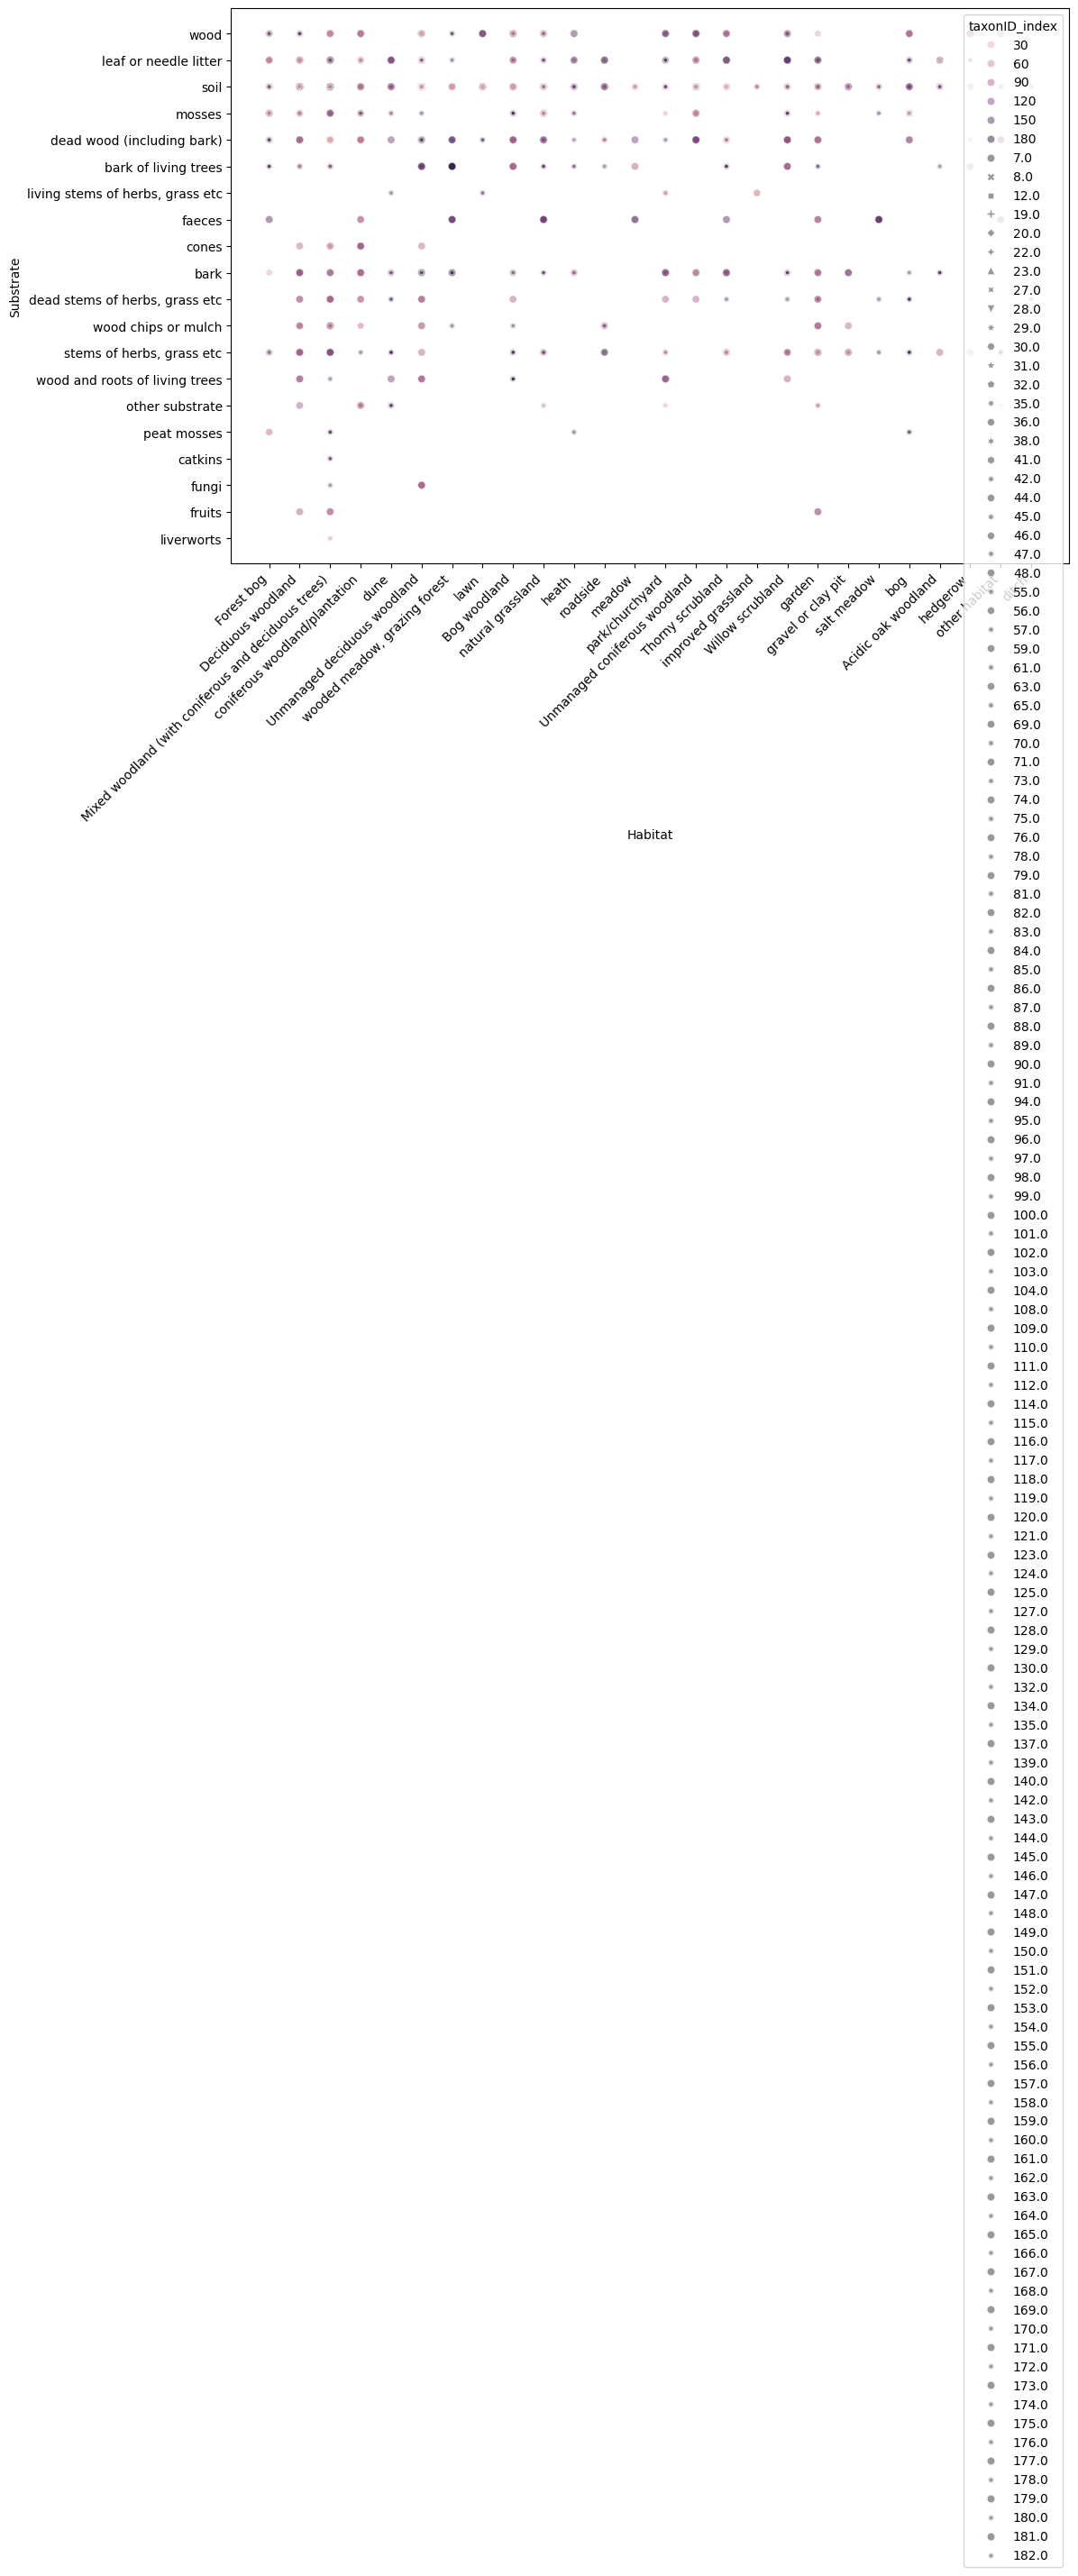

In [7]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=train_df, x='Habitat', y='Substrate', hue='taxonID_index', style='taxonID_index', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

/tmp/ipykernel_7161/930771829.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


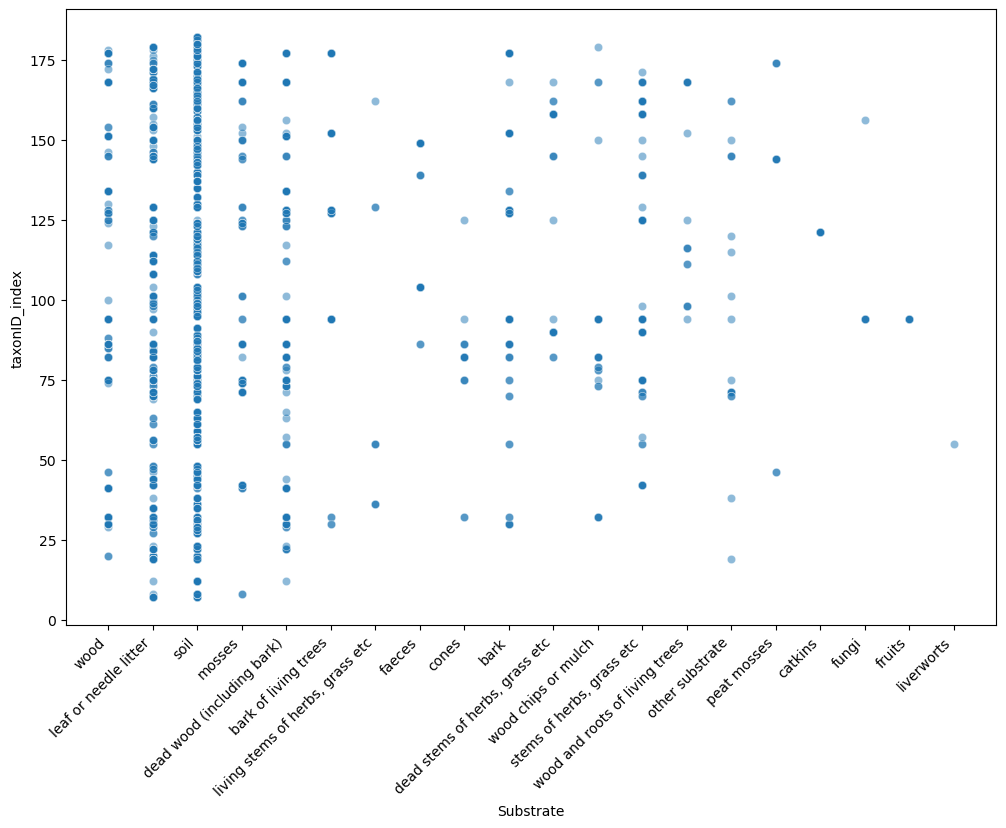

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=train_df, x='Substrate', y='taxonID_index', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

/tmp/ipykernel_7161/4154139494.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


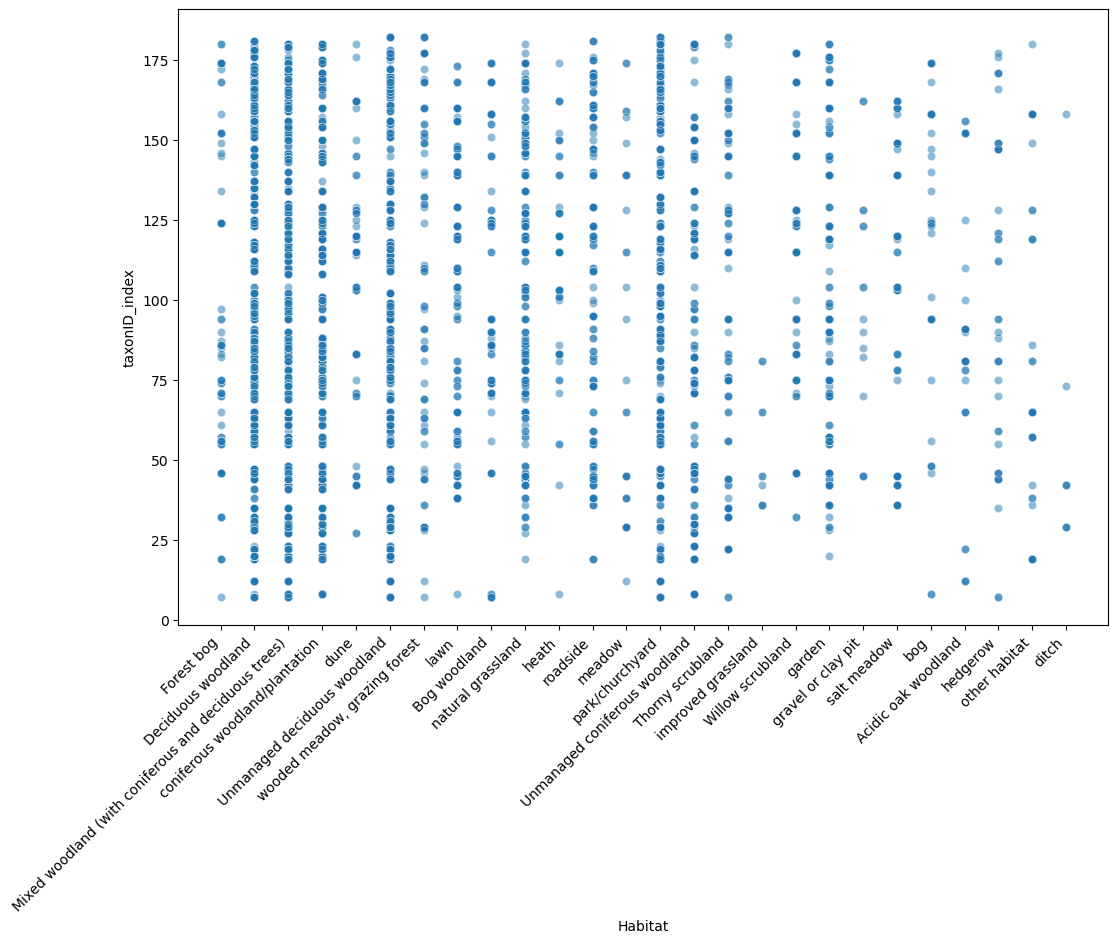

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=train_df, x='Habitat', y='taxonID_index', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()